In [1]:
import pandas as pd
import pysam
import argparse
import numpy as np
import glob

In [17]:
df = pd.read_csv('/mnt/hpc/home/xuxinran/microC/date/date_0820_1micriC_2microRUN/microRUN/ligation/no-GM-K27ac-2_L7_G028_dis.csv', header=None)
df.columns = ['readid', 'chr1', 's1', 'chr2', 's2', 'strand1', 'strand2', 'e1', 'e2', 'dis']
del df['e2']

In [18]:
((df['chr1'] == df['chr2']) & (df['dis'] > 1000)).sum()

1061

In [19]:
((df['chr1'] == df['chr2']) & (df['dis'] <= 0)).sum()

18198

In [20]:
((df['chr1'] == df['chr2'])).sum()

339725

In [21]:
339725-18198-1061

320466

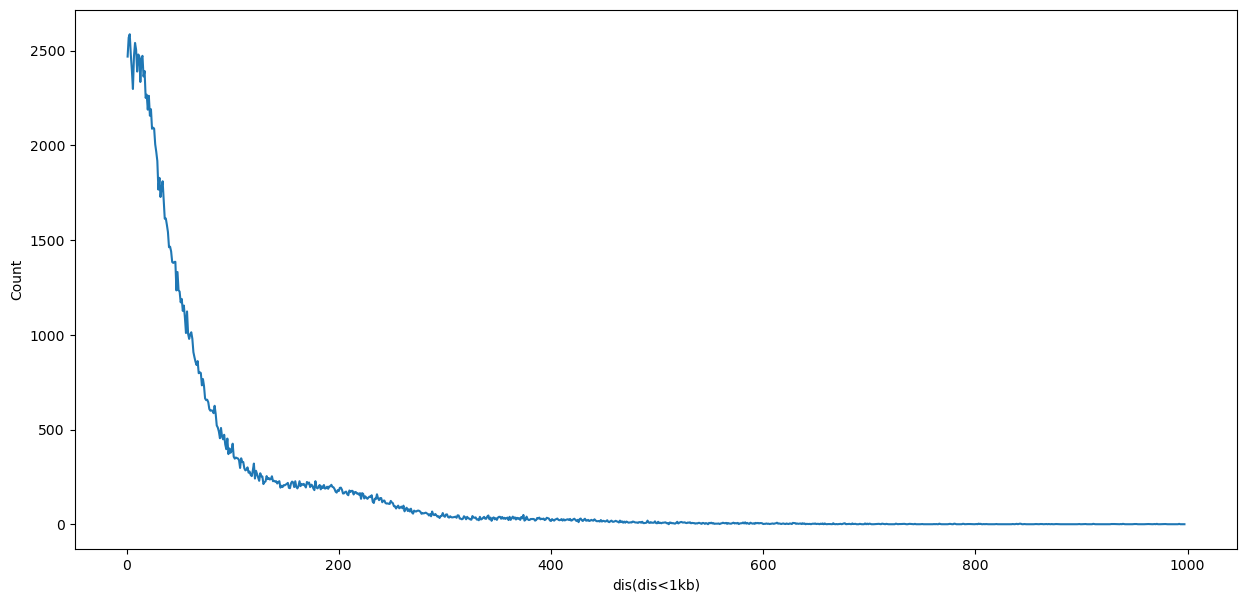

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# 筛选满足条件的行
filtered_df = df[(df['chr1'] == df['chr2']) & (df['dis'] > 0) & (df['dis'] < 1000)]

# 计算每个dis的数量
counts = filtered_df['dis'].value_counts().sort_index()
plt.figure(figsize=[15, 7])
# 绘制折线图
plt.plot(counts.index, counts.values)
plt.xlabel('dis(dis<1kb)')
plt.ylabel('Count')

plt.show()

In [10]:
df = pd.read_csv("/mnt/hpc/home/xuxinran/microC/date/date_0520/C_flash_map/C_L003_cis_map.txt", sep='\t', header=None,usecols = [0,2,4], names=['readid','s1', 's2'])
df['s1'].astype(int)
df['s2'].astype(int)
df_more1k = df[(df["s2"] - df["s1"]) >= 1000]
df_less1k = df[((df["s2"] - df["s1"]) < 1000) & ((df["s2"] - df["s1"]) > 0)]
df_unligation = df[(df["s2"] - df["s1"]) <= 0]
df_more1k['readid'].to_csv("/mnt/hpc/home/xuxinran/microC/date/date_0520/C_flash_map/C_L003_more1k.txt", sep='\t', header=None, index=None)
df_less1k['readid'].to_csv("/mnt/hpc/home/xuxinran/microC/date/date_0520/C_flash_map/C_L003_less1k.txt", sep='\t', header=None, index=None)
df_unligation['readid'].to_csv("/mnt/hpc/home/xuxinran/microC/date/date_0520/C_flash_map/C_L003_unligation.txt", sep='\t', header=None, index=None)